#  Определение частей речи с использованием рекуррентных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
* https://notebook.community/sameersingh/uci-statnlp/tutorials/rnn_examples
* https://github.com/bentrevett/pytorch-pos-tagging/blob/master/1_bilstm.ipynb
* https://github.com/Koziev/rupostagger

## Задачи для совместного разбора

1\. Рассмотрите пример работы двунаправленного рекуррентого слоя

![bi-lstm](https://discuss.pytorch.org/uploads/default/original/3X/d/3/d34a27c490e75c1a0a96128c5726ab6656427d90.jpeg)

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
batch_size, seq_len, embedding_dim = 16, 10, 32

x = th.rand(batch_size, seq_len, embedding_dim)

In [ ]:
hidden_size = 50

lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1,
               batch_first=True, bidirectional=False)
o, (h, c) = lstm(x)
print(o.shape, h.shape, c.shape)

torch.Size([16, 10, 50]) torch.Size([1, 16, 50]) torch.Size([1, 16, 50])


In [ ]:
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1,
               batch_first=True, bidirectional=True)
o, (h, c) = lstm(x)
print(o.shape, h.shape, c.shape)

torch.Size([16, 10, 100]) torch.Size([2, 16, 50]) torch.Size([2, 16, 50])


In [ ]:
o[0, -1, :]

tensor([-4.0786e-02,  1.5313e-02, -1.5331e-01,  1.9762e-02, -2.0193e-01,
         4.1268e-02, -6.7085e-02,  1.3365e-01, -4.6942e-02, -4.1361e-02,
         1.1060e-01, -1.2427e-01, -1.8635e-01, -1.2324e-01,  1.3305e-01,
         9.9042e-02,  1.9818e-02,  1.3653e-01,  1.0025e-02,  8.9405e-03,
        -2.8190e-01,  2.6199e-01, -8.8393e-02, -1.2185e-01, -1.7269e-03,
         2.1537e-01,  6.3204e-02, -1.9382e-01, -1.0577e-01,  2.4555e-02,
         1.8109e-01,  2.3038e-01, -5.8067e-02, -1.9538e-01,  1.0269e-01,
        -6.3789e-02, -2.3460e-01,  1.7523e-01,  6.3747e-02, -4.4599e-02,
         5.3393e-02, -2.5655e-02, -9.2669e-02,  5.5849e-02, -4.1522e-02,
         4.1448e-02,  4.9638e-02, -5.6492e-02,  3.5846e-02, -7.5222e-03,
         1.0258e-01,  2.2016e-02, -2.8811e-02,  8.3296e-02,  2.9533e-02,
         1.2254e-01,  2.7302e-02,  2.0808e-02, -6.0518e-02, -2.3371e-02,
         6.7984e-02, -1.1723e-01,  5.0608e-02, -1.1462e-02,  7.0921e-02,
        -7.7789e-03,  1.0406e-01, -8.2792e-02,  3.7

In [ ]:
h[0, 0]

tensor([-0.0408,  0.0153, -0.1533,  0.0198, -0.2019,  0.0413, -0.0671,  0.1336,
        -0.0469, -0.0414,  0.1106, -0.1243, -0.1863, -0.1232,  0.1330,  0.0990,
         0.0198,  0.1365,  0.0100,  0.0089, -0.2819,  0.2620, -0.0884, -0.1218,
        -0.0017,  0.2154,  0.0632, -0.1938, -0.1058,  0.0246,  0.1811,  0.2304,
        -0.0581, -0.1954,  0.1027, -0.0638, -0.2346,  0.1752,  0.0637, -0.0446,
         0.0534, -0.0257, -0.0927,  0.0558, -0.0415,  0.0414,  0.0496, -0.0565,
         0.0358, -0.0075], grad_fn=<SelectBackward0>)

2\. Рассмотрите пример работы многоуровневого рекуррентого слоя

![stacked-rnn](https://lh6.googleusercontent.com/rC1DSgjlmobtRxMPFi14hkMdDqSkEkuOX7EW_QrLFSymjasIM95Za2Wf-VwSC1Tq1sjJlOPLJ92q7PTKJh2hjBoXQawM6MQC27east67GFDklTalljlt0cFLZnPMdhp8erzO)

In [ ]:
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=2,
               batch_first=True, bidirectional=False)
o, (h, c) = lstm(x)
print(o.shape, h.shape, c.shape)

torch.Size([16, 10, 50]) torch.Size([2, 16, 50]) torch.Size([2, 16, 50])


In [ ]:
h[1, 0]

tensor([-0.0801,  0.1383,  0.0980,  0.0539,  0.1019,  0.1388, -0.0108, -0.0128,
        -0.0584, -0.1034, -0.1082,  0.0727, -0.0066,  0.0837,  0.0061, -0.0653,
        -0.0594, -0.0152, -0.0162, -0.0379,  0.1635, -0.0543, -0.1144,  0.0842,
         0.0183, -0.0069, -0.0287,  0.0757,  0.0466,  0.0792, -0.0397, -0.0251,
        -0.0330, -0.0097, -0.1113, -0.0891,  0.0288,  0.0265,  0.0321,  0.0509,
        -0.0232, -0.0847, -0.0238, -0.0160, -0.0095, -0.0128, -0.0230,  0.0045,
         0.0538, -0.0806], grad_fn=<SelectBackward0>)

In [ ]:
o[0, -1, :]

tensor([-0.0801,  0.1383,  0.0980,  0.0539,  0.1019,  0.1388, -0.0108, -0.0128,
        -0.0584, -0.1034, -0.1082,  0.0727, -0.0066,  0.0837,  0.0061, -0.0653,
        -0.0594, -0.0152, -0.0162, -0.0379,  0.1635, -0.0543, -0.1144,  0.0842,
         0.0183, -0.0069, -0.0287,  0.0757,  0.0466,  0.0792, -0.0397, -0.0251,
        -0.0330, -0.0097, -0.1113, -0.0891,  0.0288,  0.0265,  0.0321,  0.0509,
        -0.0232, -0.0847, -0.0238, -0.0160, -0.0095, -0.0128, -0.0230,  0.0045,
         0.0538, -0.0806], grad_fn=<SliceBackward0>)

In [ ]:
lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=2,
               batch_first=True, bidirectional=True)
o, (h, c) = lstm(x)
print(o.shape, h.shape, c.shape)

torch.Size([16, 10, 100]) torch.Size([4, 16, 50]) torch.Size([4, 16, 50])


In [ ]:
fc = nn.Linear(2*hidden_size, 2)
fc(o).shape

torch.Size([16, 10, 2])

## Задачи для самостоятельного решения

### 1.

<p class="task" id="1"></p>

1\. Считайте файл `pos_data.txt` и создайте на его основе два списка `X` и `y` следующего вида.

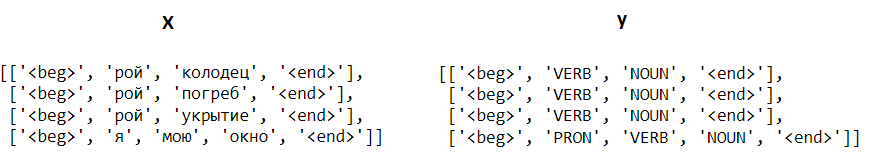

Найдите 75% квантиль распределения длин предложений и удалите из выборки те предложения, которые длиннее данного значения. Выведите на экран пару `(X[0], y[0])` и количество элементов в `X` и `y`.

- [ ] Проверено на семинаре

In [ ]:
import pandas as pd

data = pd.read_csv('pos_data.txt', sep='\t', header=None, names=['token', 'pos'], quoting=3, on_bad_lines='skip')
data

,token,pos
0,<beg>,<beg>
1,рой,VERB|Mood=Imp|Number=Sing|Person=2|VerbForm=Fin
2,колодец,NOUN|Case=Acc|Gender=Masc|Number=Sing
3,<end>,<end>
0,<beg>,<beg>
...,...,...
2,отрицательно,ADV
3,покачал,VERB|Gender=Masc|Mood=Ind|Number=Sing|Tense=Pa...
4,головой,NOUN|Case=Ins|Gender=Fem|Number=Sing
5,.,PUNCT


In [ ]:
data.iterrows()

<generator object DataFrame.iterrows at 0x7ed08a679f10>

In [ ]:
import re

x, y = [], []
current_x, current_y = [], []

for index, row in data.iterrows():
    token = str(row['token']).strip()
    pos = str(row['pos']).strip()

    if token == '<beg>' and pos == '<beg>':
        current_x = ['<beg>']
        current_y = ['<beg>']

    elif token == '<end>' and pos == '<end>':
        current_x.append('<end>')
        current_y.append('<end>')
        x.append(current_x)
        y.append(current_y)

    else:
        token = re.sub(r'[\n\t]', '', token)
        pos = re.sub(r'[\n\t]', '', pos)

        # до первого |
        base_pos = pos.split('|')[0] if '|' in pos else pos

        current_x.append(token)
        current_y.append(base_pos)

In [ ]:
x[:5], y[:5]

([['<beg>', 'рой', 'колодец', '<end>'],
  ['<beg>', 'рой', 'погреб', '<end>'],
  ['<beg>', 'рой', 'укрытие', '<end>'],
  ['<beg>', 'я', 'мою', 'окно', '<end>'],
  ['<beg>',
   'сотрудники',
   'милиции',
   'вечером',
   '31',
   'декабря',
   'уничтожили',
   'в',
   'хасавюрте',
   'четверых',
   'боевиков',
   '.',
   '<end>']],
 [['<beg>', 'VERB', 'NOUN', '<end>'],
  ['<beg>', 'VERB', 'NOUN', '<end>'],
  ['<beg>', 'VERB', 'NOUN', '<end>'],
  ['<beg>', 'PRON', 'VERB', 'NOUN', '<end>'],
  ['<beg>',
   'NOUN',
   'NOUN',
   'NOUN',
   'NUM',
   'NOUN',
   'VERB',
   'ADP',
   'NOUN',
   'NUM',
   'NOUN',
   'PUNCT',
   '<end>']])

In [ ]:
lens = [len(sent) for sent in x]
q_75 = pd.Series(lens).quantile(0.75)

q_75

np.float64(12.0)

In [ ]:
X = [sent for sent in x if len(sent) <= q_75]
y = [tags for tags, sent in zip(y, x) if len(sent) <= q_75]

X[0], y[0]

(['<beg>', 'рой', 'колодец', '<end>'], ['<beg>', 'VERB', 'NOUN', '<end>'])

In [ ]:
len(X), len(y)

(776002, 776002)

### 2.

<p class="task" id="2"></p>

2\. Разделите данные на обучающую и тестовую выборку. Создайте два Vocab на основе загруженных данных: `vocab_X` для слов и `vocab_y` для частей речи. Добавьте в словари специальные токены `<PAD>`, `<UNK>`, `<beg>`, `<end>`. Выведите на экран количество токенов в полученных словарях.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

In [ ]:
all_words = []
for sent in X:
  print(sent[1:-1])  # это я вывожу все предложения чтобы проверить правильно ли считался файл
# а снизу бредокод который я не комментила не обращайте внимания
'''
  for word in sent:
    if word == '<beg>' or word == '<end>':
      all_words.append(word)

all_words[:10]
'''

Выходные данные были обрезаны до нескольких последних строк (5000).
['поэтому', 'мы', 'опять', 'стали', 'спускаться', '.']
['их', 'маленькие', 'красные', 'глаза', 'горели', '.']
['рассказы', 'о', 'дмитрии', 'ходили', 'меж', 'дам', '.']
['надо', 'будет', 'найти', 'для', 'него', 'занятие', '.']
['один', 'раз', 'ему', 'удалось', 'поднять', 'веки', '.']
['очень', 'скоро', 'оно', 'дало', 'знать', 'о', 'себе', '.']
['нужно', 'будет', 'эту', 'девушку', 'найти', '.']
['дмитрий', 'слывет', 'хорошим', 'работником', '.']
['макс', 'спит', 'на', 'составленных', 'стульях', '.']
['рука', 'привычно', 'потянулась', 'за', 'спину', '.']
['остальные', 'молча', 'наблюдали', 'за', 'ними', '.']
['вчера', 'дмитрий', 'опять', 'нарушил', 'устав', '!']
['жизнь', 'должна', 'происходить', 'от', 'жизни', '.']
['у', 'лидии', 'всегда', 'находилось', 'занятие', '.']
['за', 'столиком', 'стало', 'невероятно', 'тихо', '.']
['почва', 'задрожала', 'от', 'тяжелых', 'ударов', '.']
['за', 'стенами', 'вновь', 'вспыхнули', 'зве

['<beg>',
 '<end>',
 '<beg>',
 '<end>',
 '<beg>',
 '<end>',
 '<beg>',
 '<end>',
 '<beg>',
 '<end>']

In [ ]:
spec = ['<PAD>', '<UNK>', '<beg>', '<end>']

In [ ]:
from collections import Counter

all_words = [w for sent in X_train
             for w in sent]
w_count = Counter(all_words)
w_count

Counter({'<beg>': 620801,
         'грохот': 128,
         'взрывов': 27,
         'усиливался': 23,
         '.': 433025,
         '<end>': 620801,
         'бог': 538,
         'встал': 1167,
         'на': 37208,
         'их': 7319,
         'сторону': 1224,
         '-': 35374,
         'от': 8451,
         'нас': 5068,
         'отдыхаешь': 7,
         'представителя': 20,
         'грузин': 15,
         'ждем': 176,
         'в': 69730,
         'тот': 1432,
         'же': 8462,
         'день': 2686,
         'перевелись': 5,
         'тараканы': 14,
         'это': 22412,
         'был': 10763,
         'сон': 326,
         'нравится': 622,
         'ли': 2659,
         'вам': 2550,
         'ее': 11779,
         'характер': 487,
         '?': 37003,
         'мяса': 73,
         'было': 13733,
         'много': 2171,
         'разрывы': 31,
         'бомб': 32,
         ',': 99183,
         'руины': 19,
         'умирающие': 5,
         'под': 2657,
         'обломками': 10,


In [ ]:
all_tags = [tag for sent in y_train
            for tag in sent]
tag_count = Counter(all_tags)
tag_count

Counter({'<beg>': 620801,
         'NOUN': 801703,
         'VERB': 695572,
         'PUNCT': 697343,
         '<end>': 620801,
         'ADP': 247131,
         'PRON': 345735,
         'ADJ': 365691,
         'PART': 106012,
         'ADV': 232260,
         'CONJ': 115763,
         'NUM': 25941,
         'INTJ': 1300,
         'H': 1816,
         'X': 4123,
         'DET': 1663,
         'LATN': 2459,
         'SYM': 105})

In [ ]:
len(tag_count)

18

In [ ]:
class Vocab:
  def __init__(self, counter, special_tok):
    self.i2s = special_tok.copy()
    self.s2i = {token: idx for idx, token in enumerate(special_tok)}

    for token, count in counter.items():
      if token not in self.s2i:
        self.i2s.append(token)
        self.s2i[token] = len(self.i2s) - 1

    self.unk_idx = self.s2i['<UNK>']
    self.pad_idx = self.s2i['<PAD>']


  def __getitem__(self, token):
    return self.s2i.get(token, self.unk_idx)

  def __len__(self):
      return len(self.i2s)

In [ ]:
vocab_X = Vocab(w_count, special_tok=spec)
vocab_y = Vocab(tag_count, special_tok=spec)

In [ ]:
vocab_X.i2s[100]

'виновата'

In [ ]:
list(vocab_X.s2i.values())[:5]

[0, 1, 2, 3, 4]

In [ ]:
vocab_y.i2s[10]

'PART'

In [ ]:
list(vocab_y.s2i.values())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
len(vocab_X), len(vocab_y)

(212077, 20)

### 3.

<p class="task" id="3"></p>

3\. Создайте класс `POSTaggingDataset`. Реализуйте `__getitem__` таким образом, чтобы он возвращал кортеж `(x, y)`, где x - это набор индексов токенов для предложений на русском языке, а `y` - набор индексов токенов для соответствующих частей речи. Используя преобразования, сделайте длины наборов индексов одинаковой фиксированной длины. Создайте два датасета: для обучающей и тестовой выборки.

Выведите на экран формы тензоров `x` и `y`:

```python
x, y = train_dset[:5]
print(x.shape, y.shape)
```



- [ ] Проверено на семинаре

In [ ]:
vocab_X['<PAD>']

0

In [ ]:
import torch as th

In [ ]:
class POSTaggingDataset:
    def __init__(self, X, y, vocab_X, vocab_y, max_len=None):
        self.X = X
        self.y = y
        self.vocab_x = vocab_X
        self.vocab_y = vocab_y
        self.max_len = max_len
        self.pad_idx_x = vocab_X['<PAD>']
        self.pad_idx_y = vocab_y['<PAD>']

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        words = self.X[idx]
        tags = self.y[idx]

        x = [self.vocab_x[w] for w in words]
        y = [self.vocab_y[t] for t in tags]

        x = x[:self.max_len] + [self.pad_idx_x] * max(0, (self.max_len - len(x)))
        y = y[:self.max_len] + [self.pad_idx_y] * max(0, (self.max_len - len(y)))

        return th.tensor(x), th.tensor(y)

In [ ]:
train_dataset =  POSTaggingDataset(X_train, y_train, vocab_X, vocab_y, max_len=20)
test_dataset =  POSTaggingDataset(X_test, y_test, vocab_X, vocab_y, max_len=20)

In [ ]:
x, y = zip(*[train_dataset[i] for i in range(5)])
x = th.stack(x)
y = th.stack(y)

print(x.shape, y.shape)

torch.Size([5, 20]) torch.Size([5, 20])


### 4.

<p class="task" id="4"></p>

4\. Создайте и обучите модель для предсказания частей речи. Игнорируйте токен `<PAD>` при расчете ошибки. Во время обучения выводите на экран значения функции потерь для эпохи, значение accuracy для эпохи.

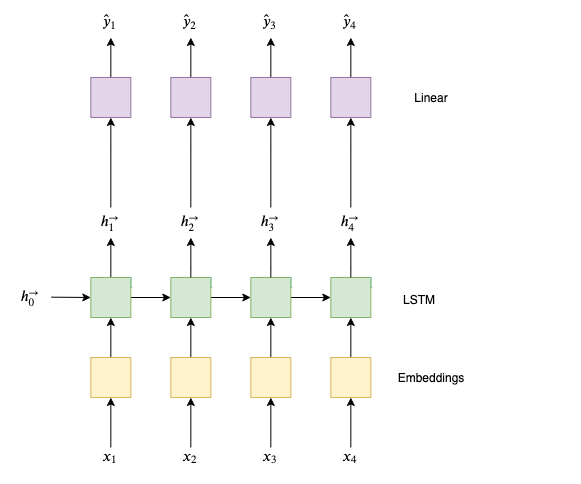

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn

class PredModel(nn.Module):
  def __init__(self, vocab_size, tag_size, embedding_dim, hidden_dim):
    super().__init__()
    self.embed = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_X['<PAD>'])
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers = 1, bidirectional=False, batch_first=True)
    self.fc = nn.Linear(hidden_dim, tag_size)

  def forward(self, x):
    embeds = self.embed(x)
    lstm_out, _ = self.lstm(embeds)
    tag = self.fc(lstm_out)

    return tag

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
device = th.device('cuda' if th.cuda.is_available() else 'cpu')

In [ ]:
vocab_size = len(vocab_X)
tag_size = len(vocab_y)
model = PredModel(vocab_size, tag_size, embedding_dim=64, hidden_dim=128).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=vocab_y['<PAD>'])
optimizer = optim.Adam(model.parameters(), lr = 0.01)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [ ]:
def train_epoch(model, dataloader, optimizer, criterion):
  model.train()
  total_loss = 0
  correct = 0
  total = 0

  for x_batch, y_batch in dataloader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    optimizer.zero_grad()

    outputs = model(x_batch)
    loss = criterion(outputs.view(-1, tag_size), y_batch.view(-1))

    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    mask = y_batch != vocab_y['<PAD>'] # тут я расчитываю accuracy, игнорируя пад
    preds = outputs.argmax(dim=2)[mask]
    correct += (preds == y_batch[mask]).sum().item()
    total += mask.sum().item()

  return total_loss / len(dataloader), correct / total

def evaluate(model, dataloader, criterion):
  model.eval()
  total_loss = 0
  correct = 0
  total = 0

  with th.no_grad():
    for x_batch, y_batch in dataloader:
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)

      outputs = model(x_batch)
      loss = criterion(outputs.view(-1, tag_size), y_batch.view(-1))
      total_loss += loss.item()

      mask = y_batch != vocab_y['<PAD>']
      preds = outputs.argmax(dim=2)[mask]
      correct += (preds == y_batch[mask]).sum().item()
      total += mask.sum().item()

  return total_loss / len(dataloader), correct / total

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
  train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
  test_loss, test_acc = evaluate(model, test_loader, criterion)

  print(f"Epoch {epoch+1}/{num_epochs}")
  print(f"train loss: {train_loss:.4f} | train acc: {train_acc:.4f}")
  print(f"test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")
  print()

Epoch 1/5
train loss: 0.1333 | train acc: 0.9533
test loss: 0.0913 | test acc: 0.9689

Epoch 2/5
train loss: 0.0692 | train acc: 0.9778
test loss: 0.0804 | test acc: 0.9723

Epoch 3/5
train loss: 0.0566 | train acc: 0.9825
test loss: 0.0795 | test acc: 0.9738

Epoch 4/5
train loss: 0.0510 | train acc: 0.9844
test loss: 0.0838 | test acc: 0.9731

Epoch 5/5
train loss: 0.0477 | train acc: 0.9855
test loss: 0.0866 | test acc: 0.9739



### 5.

<p class="task" id="5"></p>

5\. Постройте и выведите на экран classification report на основе тестовой выборки. Выведите на экран пример предсказания частей речи обученной моделью.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

def get_cr(model, dataloader, vocab_y):
  model.eval()
  y_true = []
  y_pred = []

  with th.no_grad():
    for x_batch, y_batch in dataloader:
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)
      outputs = model(x_batch)

      mask = y_batch != vocab_y['<PAD>']
      preds = outputs.argmax(dim=2)[mask]

      y_true.extend(y_batch[mask].cpu().numpy())
      y_pred.extend(preds.cpu().numpy())

  target_names = [vocab_y.i2s[i] for i in range(len(vocab_y)) if vocab_y.i2s[i] not in ['<PAD>', '<UNK>']] # индексы в теги

  print(classification_report(y_true,y_pred,target_names=target_names,zero_division=0))

get_cr(model, test_loader, vocab_y)

              precision    recall  f1-score   support

       <beg>       1.00      1.00      1.00    155201
       <end>       1.00      1.00      1.00    155201
        NOUN       0.99      0.95      0.97    200174
        VERB       0.96      0.99      0.98    174024
       PUNCT       1.00      1.00      1.00    174036
         ADP       1.00      0.99      0.99     61599
        PRON       0.95      0.99      0.97     86819
         ADJ       0.91      0.91      0.91     91304
        PART       0.97      0.85      0.91     26548
         ADV       0.93      0.96      0.95     57898
        CONJ       0.91      0.95      0.93     29056
         NUM       0.99      0.86      0.92      6455
        INTJ       0.69      0.36      0.47       346
           H       0.69      0.21      0.32       435
           X       0.11      0.35      0.17      1105
         DET       0.17      0.02      0.03       421
        LATN       0.51      0.47      0.49       551
         SYM       0.57    

In [ ]:
idx = 5
model.eval()
x, y_true = test_dataset[idx]

with th.no_grad():
  x_tensor = x.unsqueeze(0).to(device)  # добавляю batch dimension
  y_pred = model(x_tensor).argmax(dim=2).squeeze().cpu().numpy()

mask = x != vocab_X['<PAD>']
words = [vocab_X.i2s[i] for i in x[mask].tolist()]
true_tags = [vocab_y.i2s[i] for i in y_true[mask].tolist()]
pred_tags = [vocab_y.i2s[i] for i in y_pred[mask.numpy()]]

print('пример:')
print(" ".join(words))
print("true тэги:", " ".join(true_tags))
print("pred тэги:", " ".join(pred_tags))

пример:
<beg> меня пригласил горев . <end>
true тэги: <beg> PRON VERB NOUN PUNCT <end>
pred тэги: <beg> PRON VERB NOUN PUNCT <end>


### 6.

<p class="task" id="6"></p>

6\. Решите задачи 4-5, используя двунаправленный рекуррентный слой.

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn

class PredModel2(nn.Module):
  def __init__(self, vocab_size, tag_size, embedding_dim, hidden_dim):
    super().__init__()
    self.embed = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_X['<PAD>'])
    self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers = 1, bidirectional=True, batch_first=True)
    self.fc = nn.Linear(hidden_dim, tag_size)

  def forward(self, x):
    embeds = self.embed(x)
    lstm_out, _ = self.lstm(embeds)
    tag = self.fc(lstm_out)

    return tag

In [ ]:
vocab_size = len(vocab_X)
tag_size = len(vocab_y)
model = PredModel2(vocab_size, tag_size, embedding_dim=64, hidden_dim=128).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=vocab_y['<PAD>'])
optimizer = optim.Adam(model.parameters(), lr = 0.01)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
  train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
  test_loss, test_acc = evaluate(model, test_loader, criterion)

  print(f"Epoch {epoch+1}/{num_epochs}")
  print(f"train loss: {train_loss:.4f} | train acc: {train_acc:.4f}")
  print(f"test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")
  print()

Epoch 1/5
train loss: 0.1219 | train acc: 0.9606
test loss: 0.0799 | test acc: 0.9747

Epoch 2/5
train loss: 0.0640 | train acc: 0.9804
test loss: 0.0678 | test acc: 0.9792

Epoch 3/5
train loss: 0.0530 | train acc: 0.9840
test loss: 0.0665 | test acc: 0.9791

Epoch 4/5
train loss: 0.0481 | train acc: 0.9854
test loss: 0.0683 | test acc: 0.9799

Epoch 5/5
train loss: 0.0441 | train acc: 0.9868
test loss: 0.0798 | test acc: 0.9751



In [ ]:
get_cr(model, test_loader, vocab_y)

              precision    recall  f1-score   support

       <beg>       1.00      1.00      1.00    155201
       <end>       1.00      1.00      1.00    155201
        NOUN       0.99      0.96      0.97    200174
        VERB       0.99      0.97      0.98    174024
       PUNCT       1.00      1.00      1.00    174036
         ADP       0.99      1.00      1.00     61599
        PRON       0.97      0.99      0.98     86819
         ADJ       0.92      0.94      0.93     91304
        PART       0.95      0.88      0.92     26548
         ADV       0.95      0.96      0.95     57898
        CONJ       0.92      0.95      0.94     29056
         NUM       0.70      0.88      0.78      6455
        INTJ       0.78      0.35      0.48       346
           H       0.36      0.57      0.44       435
           X       0.11      0.40      0.17      1105
         DET       0.31      0.02      0.04       421
        LATN       0.08      0.73      0.15       551
         SYM       0.78    

In [ ]:
idx = 10
model.eval()
x, y_true = test_dataset[idx]

with th.no_grad():
  x_tensor = x.unsqueeze(0).to(device)  # добавляю batch dimension
  y_pred = model(x_tensor).argmax(dim=2).squeeze().cpu().numpy()

mask = x != vocab_X['<PAD>']
words = [vocab_X.i2s[i] for i in x[mask].tolist()]
true_tags = [vocab_y.i2s[i] for i in y_true[mask].tolist()]
pred_tags = [vocab_y.i2s[i] for i in y_pred[mask.numpy()]]

print('пример:')
print(" ".join(words))
print("true тэги:", " ".join(true_tags))
print("pred тэги:", " ".join(pred_tags))

пример:
<beg> акт всегда имеет внешний носитель . <end>
true тэги: <beg> NOUN ADV VERB ADJ NOUN PUNCT <end>
pred тэги: <beg> NOUN ADV VERB ADJ NOUN PUNCT <end>
